<a href="https://colab.research.google.com/github/NeanderDanubio26827/BaseDeDadosTitanic/blob/main/AplicacaoSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Todas as importações necessárias

In [34]:
from optparse import Values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
import collections

A função faixa_etaria é uma forma de tratar melhor os dados. 

In [35]:
def faixa_etaria(idade):
    if idade == np.nan:
        return 'Não informada'
    elif '0' <= idade <= '10':
        return 'Criança'
    elif '11' <= idade <= '18':
        return 'Jovem'
    elif '19' <= idade <= '50':
        return 'Adulto'
    else:
        return 'Idoso'

Os comando abaixo são para receber a base de dados que se encontra em github de um dos membros da equipe. 

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/NeanderDanubio26827/projetoKNN/main/CVLI_12_2021Tratado.csv' , sep=';')

df.head()

,Município,AIS,Natureza,Data,Hora,Dia da Semana,Tipo de Arma,Gênero,Idade da Vítima,Escolaridade da Vítima,Raça da Vítima
0,Canindé,AIS 15,HOMICIDIO DOLOSO,01/jan/21,00:30,Sexta,Arma de fogo,Masculino,Não Informada,Ensino Fundamental Incompleto,Não Informada
1,Mombaça,AIS 22,LESAO CORPORAL SEGUIDA DE MORTE,01/jan/21,00:30,Sexta,Outros meios,Feminino,15,Ensino Fundamental Incompleto,Parda
2,Iguatu,AIS 21,HOMICIDIO DOLOSO,01/jan/21,03:00,Sexta,Arma branca,Masculino,16,Alfabetizado,Não Informada
3,Fortaleza,AIS 09,ROUBO SEGUIDO DE MORTE (LATROCINIO),01/jan/21,04:30,Sexta,Arma de fogo,Masculino,20,Ensino Fundamental Completo,Não Informada
4,Sobral,AIS 14,HOMICIDIO DOLOSO,01/jan/21,05:00,Sexta,Arma de fogo,Masculino,26,Alfabetizado,Não Informada


In [37]:
mlb = MultiLabelBinarizer()

In [38]:
##Esse comando é para saber quantos instâncias da base de dados são nulas
df.isnull().sum()

Município                 0
AIS                       0
Natureza                  0
Data                      0
Hora                      0
Dia da Semana             0
Tipo de Arma              0
Gênero                    0
Idade da Vítima           0
Escolaridade da Vítima    0
Raça da Vítima            0
dtype: int64

In [39]:
##Esse comando é para saber quantos instâncias da base de dados são do tipo NAN
df.isna().sum()

Município                 0
AIS                       0
Natureza                  0
Data                      0
Hora                      0
Dia da Semana             0
Tipo de Arma              0
Gênero                    0
Idade da Vítima           0
Escolaridade da Vítima    0
Raça da Vítima            0
dtype: int64

In [40]:
## chamando a função faixa_etaria
## excluindo o campo 'Idade da Vítima
## exibição da base
df['FaixaEtaria']= [faixa_etaria(k) for k in df['Idade da Vítima'].values]
df = df.drop('Idade da Vítima', axis=1)
print(df)

      Município     AIS                             Natureza       Data  \
0       Canindé  AIS 15                     HOMICIDIO DOLOSO  01/jan/21   
1       Mombaça  AIS 22      LESAO CORPORAL SEGUIDA DE MORTE  01/jan/21   
2        Iguatu  AIS 21                     HOMICIDIO DOLOSO  01/jan/21   
3     Fortaleza  AIS 09  ROUBO SEGUIDO DE MORTE (LATROCINIO)  01/jan/21   
4        Sobral  AIS 14                     HOMICIDIO DOLOSO  01/jan/21   
...         ...     ...                                  ...        ...   
3294  Fortaleza  AIS 06                     HOMICIDIO DOLOSO  31/dez/21   
3295  Fortaleza  AIS 03                     HOMICIDIO DOLOSO  31/dez/21   
3296  Fortaleza  AIS 02                     HOMICIDIO DOLOSO  31/dez/21   
3297  Itaitinga  AIS 25                     HOMICIDIO DOLOSO  31/dez/21   
3298      Milhã  AIS 20                     HOMICIDIO DOLOSO  31/dez/21   

       Hora Dia da Semana  Tipo de Arma     Gênero  \
0     00:30         Sexta  Arma de fogo  Masc

In [41]:
## Mais tratamento dos dados
## facilia no restante do código
## eliminação de atributos desnedesnecessários
## criação da lista  'colunas' que será
## usada posteriormente
df['TipoCrime'] = df['Natureza']
df['Gênero'] = df['Gênero']
df['Raça'] = df['Raça da Vítima']
df['Escolaridade'] = df['Escolaridade da Vítima']
df = df.drop('Raça da Vítima', axis=1)
df = df.drop('Natureza', axis=1)
df = df.drop('Escolaridade da Vítima', axis=1)



df = df[['TipoCrime',  'Gênero', 'FaixaEtaria', 'Escolaridade','Raça']]
colunas = [ k for k in df.keys() if k != 'Gênero']
print(colunas)
df.head()

['TipoCrime', 'FaixaEtaria', 'Escolaridade', 'Raça']


,TipoCrime,Gênero,FaixaEtaria,Escolaridade,Raça
0,HOMICIDIO DOLOSO,Masculino,Idoso,Ensino Fundamental Incompleto,Não Informada
1,LESAO CORPORAL SEGUIDA DE MORTE,Feminino,Jovem,Ensino Fundamental Incompleto,Parda
2,HOMICIDIO DOLOSO,Masculino,Jovem,Alfabetizado,Não Informada
3,ROUBO SEGUIDO DE MORTE (LATROCINIO),Masculino,Adulto,Ensino Fundamental Completo,Não Informada
4,HOMICIDIO DOLOSO,Masculino,Adulto,Alfabetizado,Não Informada


In [42]:
for k in colunas:
 aux =  df[k].unique()
 print(aux)

['HOMICIDIO DOLOSO' 'LESAO CORPORAL SEGUIDA DE MORTE'
 'ROUBO SEGUIDO DE MORTE (LATROCINIO)' 'FEMINICÍDIO']
['Idoso' 'Jovem' 'Adulto' 'Criança']
['Ensino Fundamental Incompleto' 'Alfabetizado'
 'Ensino Fundamental Completo' 'Não Informada' 'Ensino Médio Incompleto'
 'Ensino Médio Completo' 'Não Alfabetizado' 'Superior Incompleto'
 'Superior Completo']
['Não Informada' 'Parda' 'Branca' 'Preta' 'Amarela' 'Indígena']


In [43]:
## comandos para plotagem 
## dos histogramas que exibem 
## a frequência absoluta
# plt.figure(figsize=(30, 30))
# colors = sns.color_palette()
# for i in range(0,len(colunas)):
     
#     plt.subplot(4, 2, i+1)
#     _ = sns.histplot(df, x=colunas[i], color=colors[0 % 8])
#     plt.xlabel(colunas[i],fontsize=15)

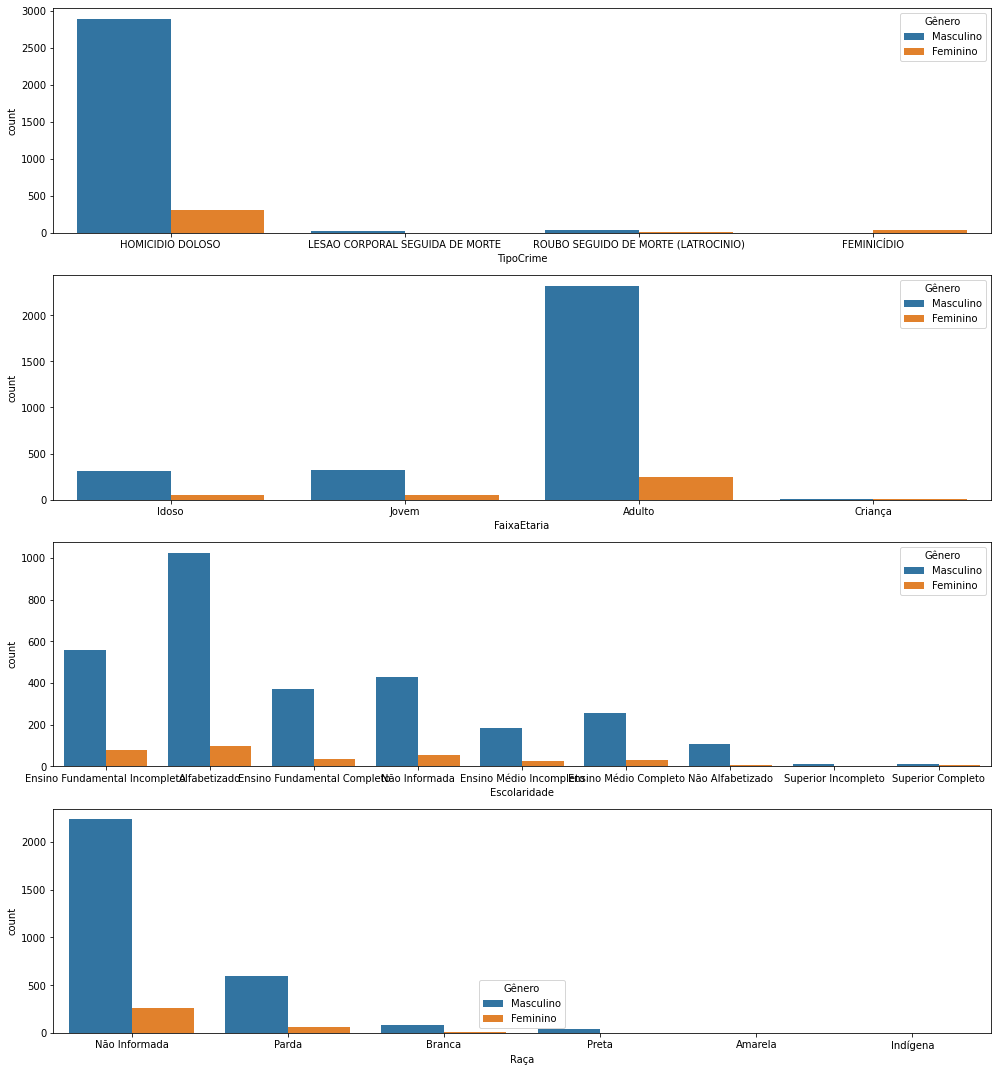

In [44]:
lin = len(colunas)
col = 1

plt.figure(figsize=(14,15))
plt.subplot(lin,col,1)
sns.countplot(data=df, x='TipoCrime',hue='Gênero');
plt.subplot(lin,col,2)
sns.countplot(data=df, x='FaixaEtaria',hue='Gênero');
plt.subplot(lin,col,3)
sns.countplot(data=df, x='Escolaridade',hue='Gênero');
plt.subplot(lin,col,4)
sns.countplot(data=df, x='Raça',hue='Gênero');
plt.tight_layout()

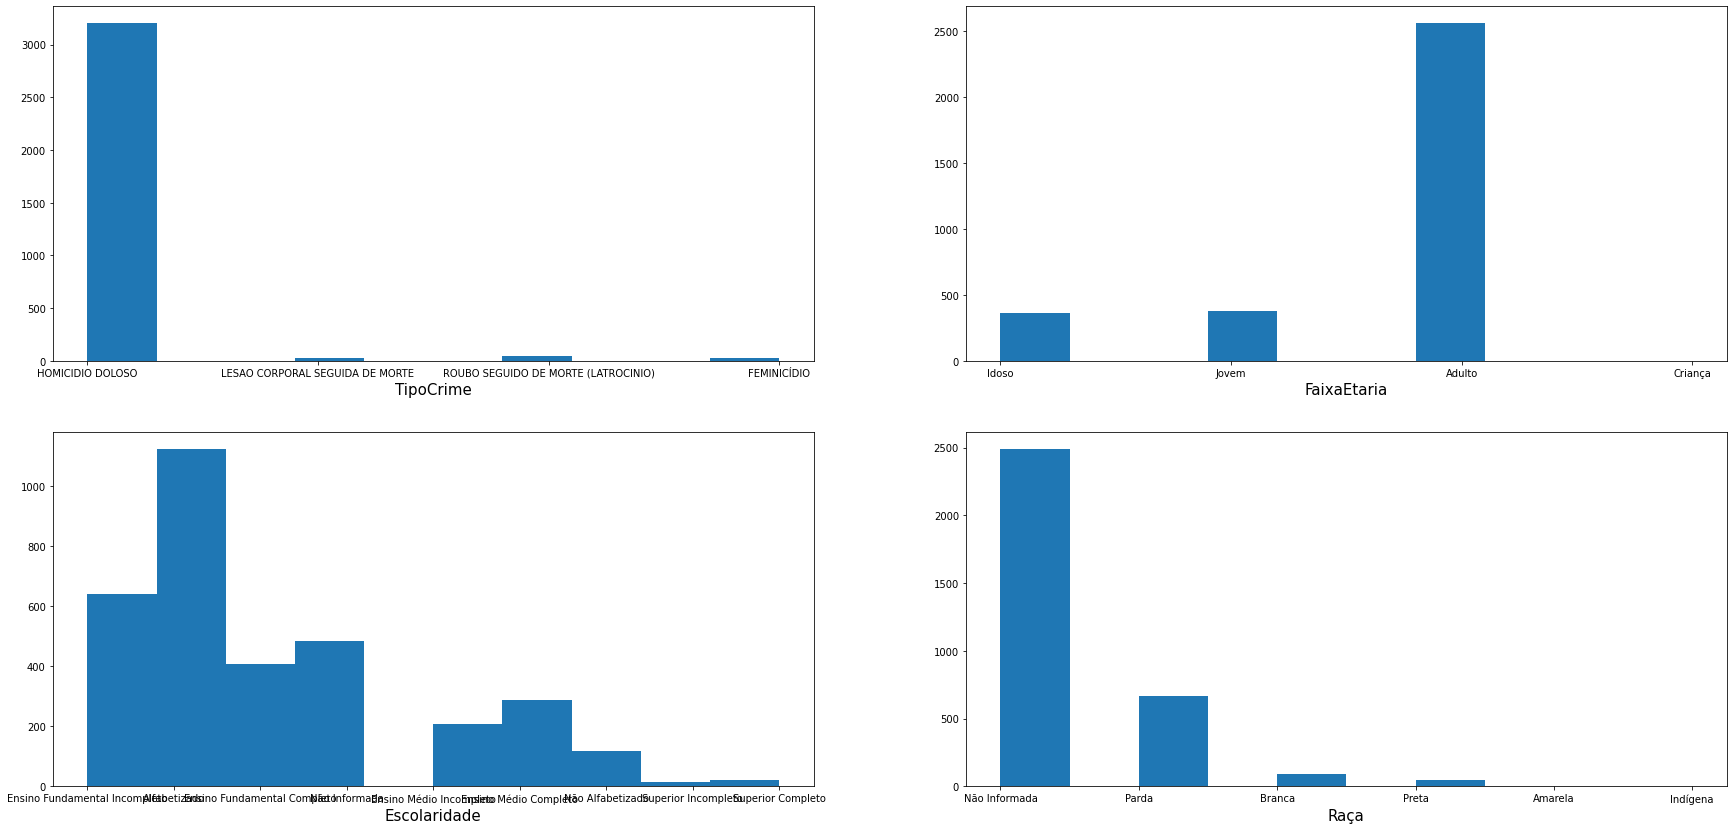

In [45]:
plt.figure(figsize=(30, 30))
colors = sns.color_palette()
for i in range(0,len(colunas)):
     
    plt.subplot(4, 2, i+1)
    _ = plt.hist(df[colunas [i]], color=colors[0 % 8])
    plt.xlabel(colunas[i],fontsize=15)

In [46]:
## Esses comandos são usado para transformar os atributos 
## De categóricos para numéricos

enconder = LabelEncoder()
sc = StandardScaler()

# df['TipoCrime'] = enconder.fit_transform(df['TipoCrime'])
# df['Gênero'] = enconder.fit_transform(df['Gênero'])
# df['FaixaEtaria'] = enconder.fit_transform(df['FaixaEtaria'])
# df['Raça'] = enconder.fit_transform(df['Raça'])
# df['Escolaridade'] = enconder.fit_transform(df['Escolaridade'])

In [47]:
acc = []
prec = []
rec = []
f1 = []
modelos = []

In [48]:
df['TipoCrime'] = mlb.fit_transform(df['TipoCrime'])
df['Gênero'] = mlb.fit_transform(df['Gênero'])
df['FaixaEtaria'] = mlb.fit_transform(df['FaixaEtaria'])
df['Raça'] = mlb.fit_transform(df['Raça'])
df['Escolaridade'] = mlb.fit_transform(df['Escolaridade'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

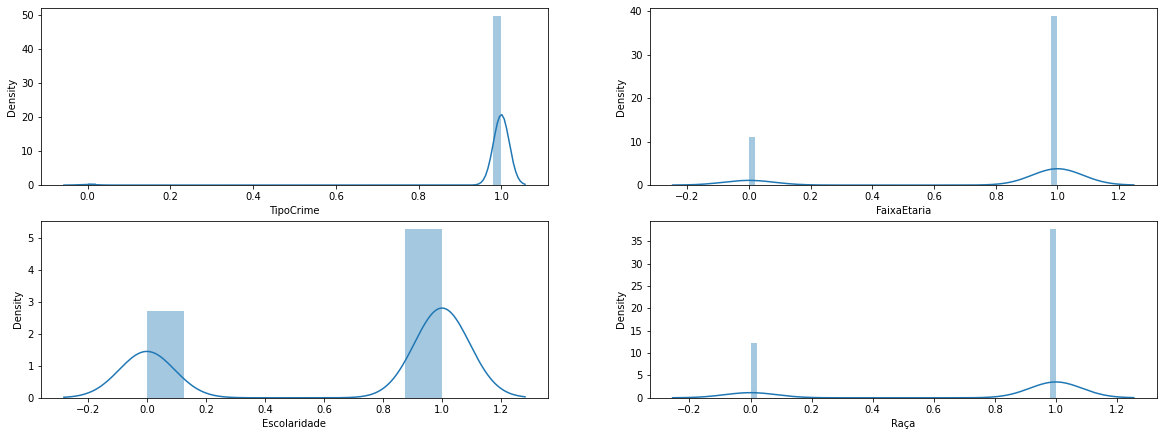

In [49]:
## Esse comando é para traçar a distribuição
## De probabilidades de cada atributo
col = 3
linhas = len(colunas)
colors = sns.color_palette("Paired")
plt.figure(figsize=(20, 15))
for i in range(0,len(colunas)):     
     plt.subplot(4, 2, i+1)
     sns.distplot(df[colunas[i]])

In [50]:
total = len(df.index)
treino = df.iloc[: int(total * 0.7)]
teste = df.iloc[ int(total * 0.7)+1 :]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

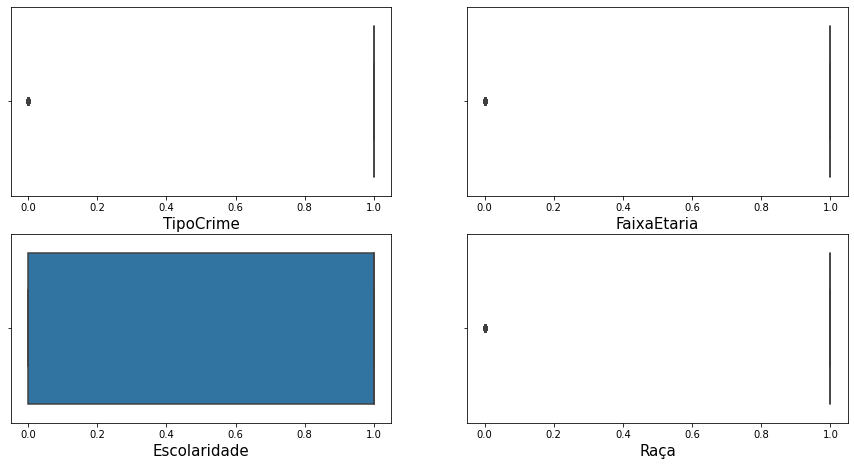

In [51]:
## Esses comandos servem para
## verificar as distribuições de
## outliers com a ferramenta
## boxplot

plt.figure(figsize=(15, 16))
colors = sns.color_palette()
for i in range(0,len(colunas)):
     
    plt.subplot(4, 2, i+1)
    _ = sns.boxplot(df[colunas [i]], color=colors[0 % 8])
    plt.xlabel(colunas[i],fontsize=15)

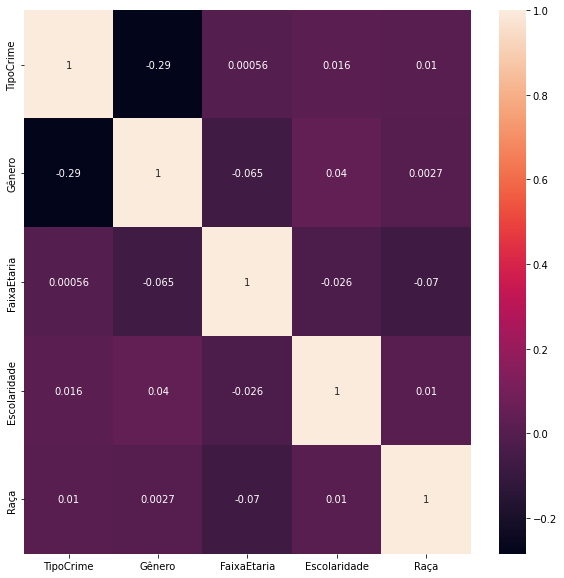

In [52]:
## Comando para Heatmap

plt.figure(figsize=(10, 10))
corr = df.corr()
_ = sns.heatmap(corr, annot=True )



In [53]:
X = df.drop('Gênero', axis=1).values
print(X)

Y= df['Gênero'].values
print(Y)

[[1 0 1 1]
 [1 0 1 0]
 [1 0 0 1]
 ...
 [1 0 1 1]
 [1 1 1 1]
 [1 1 1 0]]
[0 1 0 ... 0 0 0]


In [54]:
## Usando a função train_test_test para
## separar os dados de testes e de treinos
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

In [55]:
modelo = SVC()



Uma forma diferente de conseguir a acuracia

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
## Varíavel para os parâmetros
## entre eles o tipo de função kernel
parametros = {'C' : [1,10,20,30,40,50,60,100],
             'kernel' : ['linear','rbf','sigmoid'],
             'gamma' : ['scale','auto']
             }

In [58]:
## Obtendo o melhor modelo
## Ao invês de usar a função SVM para 
## Cada parâmetro individualmente
## EScolhe-se a melhor combinação de todos eles
melhor_modelo = GridSearchCV(modelo, parametros, n_jobs=-1, cv=5, refit=True)

In [59]:

melhor_modelo.fit(X_treino, Y_treino)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [60]:
modelo_final = melhor_modelo.best_estimator_



In [61]:
Y_previsto = modelo_final.predict(X_teste)

In [62]:
## Criando a matriz de confusão
cm=confusion_matrix(Y_teste,Y_previsto)
cm


array([[726,   0],
       [ 93,   6]])

In [63]:
modelo_final.score(X_teste,Y_teste)

0.8872727272727273

Outro modo de conseguir as métricas

In [64]:
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler(feature_range=(0,1)) 

for col in colunas:
    df[col] = normalizador.fit_transform(df[col].values.reshape(-1, 1))


In [65]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_treino,Y_treino)


Y_pred_svc = svc.predict(X_teste)

acc_svc = accuracy_score(Y_teste,Y_pred_svc)
prec_svc = precision_score(Y_teste,Y_pred_svc)
rec_svc = recall_score(Y_teste,Y_pred_svc)
f1_svc = f1_score(Y_teste,Y_pred_svc)

print("Acuracia SVC = {:0.2f}".format(acc_svc))
print("Precisão SVC = {:0.2f}".format(prec_svc))
print("Recall SVC = {:0.2f}".format(rec_svc))
print("F1 SVC = {:0.2f}".format(f1_svc))

acc.append(acc_svc)
prec.append(prec_svc)
rec.append(rec_svc)
f1.append(f1_svc)
modelos.append("SVM")



Acuracia SVC = 0.89
Precisão SVC = 1.00
Recall SVC = 0.06
F1 SVC = 0.11


In [66]:
dici = {"Modelo" : modelos, "Acuracia" : acc, "Precisao" : prec, "Recall" : rec, "F1" : f1}

pd_dici = pd.DataFrame(dici)

pd_dici = pd_dici.sort_values(by='Recall',ascending=False)

pd_dici

,Modelo,Acuracia,Precisao,Recall,F1
0,SVM,0.887273,1.0,0.060606,0.114286
